In [68]:
import pickle
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd

sys.path.append("../")
from utils.preprocessing import *

### predict using the model

In [69]:
[features, scaled_features] = np.load('../processed_data/features_video_exp_16.npy', allow_pickle=True)
with open('Z:/hsu/output/comprehensive_behavior_model.pkl', 'rb') as fr:
    model = pickle.load(fr)
predictions = model.predict(features)

In [70]:
behavior_nonest_cats = ['torso_groom', 'investigate_0', 'unsure_0', 'wall_rear_0', 'rear_0',
                        'unsure_2', 'rear', 'investigate_1', 'investigate_2', 'right_itch',
                        'investigate_3', 'sleep_scrunch_0', 'sleep_scrunch_1', 'wall_rear_1', 'right_body_groom',
                        'face_groom_1', 'dive_scrunch', 'head_groom', 'left_orient', 'left_investigate',
                        'face_groom_2', 'left_body groom', 'left_itch_1', 'left_itch_2', 'face_groom_3',
                        'paw_groom', 'locomotion', 'right_forepaw_orient', 'right_orient']

len(behavior_nonest_cats), model.n_classes_

(29, 29)

In [71]:
behavior_nonest_cats.index('face_groom_1')

15

In [72]:
behavior_nonest_merged = [6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 28]
len(behavior_nonest_merged)

16

In [73]:
total_counts = {key:  [] for key in [behavior_nonest_cats[j] 
                                     for j in behavior_nonest_merged]}

for i in behavior_nonest_merged:
    total_counts[behavior_nonest_cats[i]] = len(np.where(predictions==i)[0])

In [74]:
df_counts_100ms = pd.DataFrame(total_counts, index=[0])
df_counts_100ms.to_csv('../test_behavior_counts.csv', index=None)

In [75]:
total_loco = len(np.where(predictions==behavior_nonest_cats.index('locomotion'))[0])
total_contra = len(np.where(predictions==behavior_nonest_cats.index('contra_orient'))[0])

ValueError: 'contra_orient' is not in list

In [76]:
comp_loco_contra = [total_loco, total_contra]
plt.bar(np.arange(len(comp_loco_contra)), comp_loco_contra)

NameError: name 'total_contra' is not defined

### place side-by-side to visualize pattern

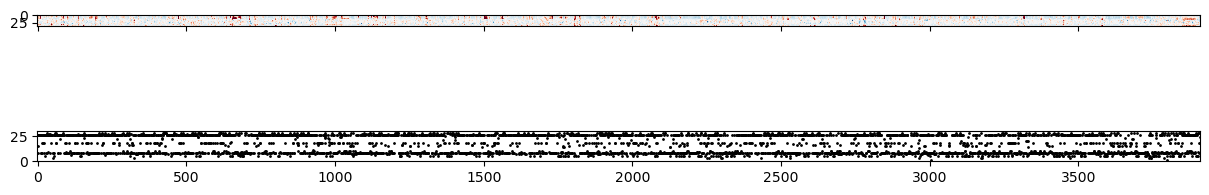

In [77]:
# plot scaled features with the corresponding predictions
fig, ax = plt.subplots(2, 1, figsize=(15, 3), gridspec_kw={'height_ratios': [6, 1]}, sharex=True)
# first 30 seconds
ax[0].imshow(scaled_features.T[:, ::10], vmin=-2, vmax=2, cmap='RdBu_r')
ax[1].scatter(np.arange(len(predictions[::10])), predictions[::10], s=1, color='k')
plt.show()

In [78]:
predictions[:50]

array([26, 26, 26, 26, 18, 18, 26, 18, 16, 15, 15, 18, 26, 28, 26,  8,  8,
        8, 28,  8,  8, 28, 26,  7,  8,  8, 28,  8, 18, 28, 26, 28,  8, 16,
        8, 18, 28, 10, 28,  8, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26],
      dtype=int64)

In [79]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
np.unique([predictions[id_start] for id_start in idx_start], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64),
 array([   1,    5,    2,   85,    8, 1579,  179,  541, 4172,  764,  581,
           8,    8,   40,  345,  482,   60, 2388,   32,   13,   72,  228,
         164,   44,   33, 4198,  439, 1873], dtype=int64))

### Save processed file

In [80]:
np.save('../processed_data/predict_video_2.npy', predictions)

In [81]:
%store -r save_path
np.save(os.path.join(save_path, 'predict_video_exp_16.npy'), predictions)

In [19]:
stim_on = 3
# in seconds, when did the animal perform behavior 2
behavior_times = np.where(predictions==stim_on)[0]/10
behavior_times

array([   4.6,   45.1,   67. ,   67.1,  135.9,  198.3,  198.4,  202.2,
        391.3,  417. ,  419.2,  424.5,  425.1,  478.6,  479.3,  542.8,
        706.3,  708.5,  708.7,  730.6,  730.7,  730.9,  731. ,  785.8,
        786.7,  787.3,  788.5,  788.8,  788.9,  789. ,  797.5,  798.2,
        800.7,  802.5,  804.5,  804.6,  804.7,  805. ,  805.7,  814.6,
        817. ,  835.1,  835.4,  835.5,  835.8,  837.7,  839. ,  839.1,
        839.2,  847.3,  847.4,  849.1,  851.7,  857.7,  983.8, 1038.6,
       1125.1, 1125.2, 1125.4, 1126. , 1126.9, 1127.4, 1200.6, 1201.2,
       1230.7, 1231. , 1231.4, 1231.5, 1231.8, 1231.9, 1247.6, 1263.2,
       1306.4, 1332.5, 1344.4, 1344.5, 1344.6, 1344.8, 1346.3, 1427.9,
       1441.8, 1488.4, 1497.9, 1498.2, 1521.3, 1532. , 1533.1, 1533.9,
       1537.8, 1538.1, 1540.8, 1558.1, 1558.5, 1558.6, 1562.3, 1583.7,
       1595. , 1599.8, 1601.9, 1604. , 1605. , 1605.1, 1607.5, 1607.6,
       1607.8, 1608.4, 1611.4, 1611.9, 1614.2, 1614.9, 1615. , 1621.4,
      

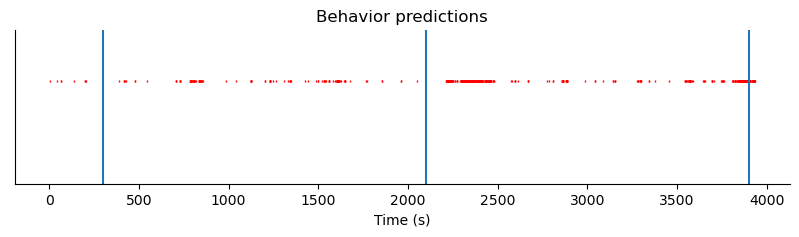

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
# ax.plot(onset_times,
#         np.ones_like(onset_times),
#         ls='', marker='|', markersize=1, c='k', alpha=1)
ax.plot(behavior_times,
        np.ones_like(behavior_times)+0.5,
        ls='', marker='|', markersize=1, c='r', alpha=1)
ax.set_yticks([])
ax.vlines(5*60, 0.5, 2)
ax.vlines(35*60, 0.5, 2)
ax.vlines(65*60, 0.5, 2)
ax.set_ylim([0.5, 2])

# ax.set_xlim([50, 100])
ax.set_title('Behavior predictions')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Time (s)')
plt.show()